In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('alzheimers_disease_data.csv')

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
df['DoctorInCharge'].unique()

array(['XXXConfid'], dtype=object)

Since an actual doctor name is not present, and all the values are confidential, dropping this column will be for the best. Also, Patient id wouldnt matter much, dropping that as well.


In [8]:
df=df.drop('DoctorInCharge',axis=1)

In [10]:
df=df.drop('PatientID',axis=1)

# Handling Missing Values (if any)

In [11]:
df.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

As it shows, there are no null values.

In [15]:
df.duplicated().unique()

array([False])

This suggests that no duplicated values/records exist as well.

# Understanding Data


In [23]:
df['Age'].unique()

array([73, 89, 74, 86, 68, 75, 72, 87, 78, 84, 64, 69, 63, 65, 82, 77, 71,
       83, 79, 67, 66, 70, 85, 60, 88, 62, 81, 61, 80, 90, 76],
      dtype=int64)

Ages range from 60-90

<Axes: >

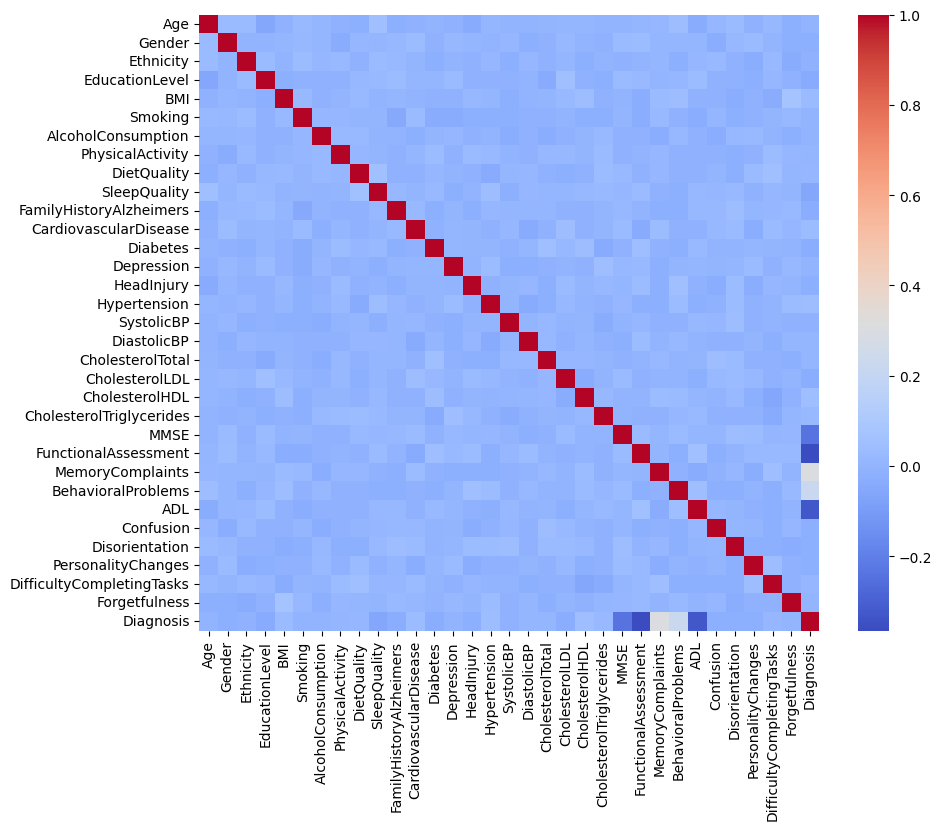

In [29]:
plt.figure(figsize=(10, 8))
matrix=df.corr()
sns.heatmap(matrix,cmap='coolwarm')

This correlation matrix suggests that all the features are almost related to each other, making it difficult to remove any feature as such


<Axes: xlabel='Gender', ylabel='Diagnosis'>

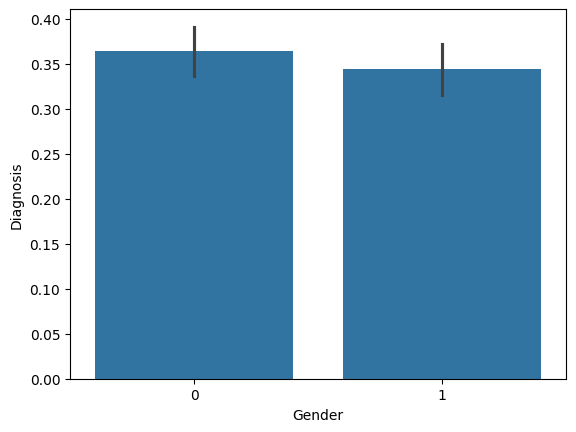

In [39]:
sns.barplot(x='Gender',y='Diagnosis',data=df)

So, this suggests that, diagnosis outcomes for both male and female is around the same, gender doesn't affect much on the diagnosis

<Axes: xlabel='Smoking', ylabel='Diagnosis'>

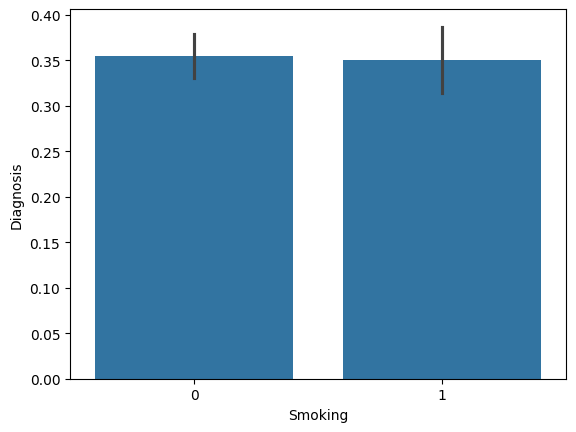

In [55]:
sns.barplot(x='Smoking',y='Diagnosis',data=df)

Smokers and Non Smokers have almost the same diagnosis rate as well, and non smokers being a bit higher which is already known.


<Axes: xlabel='MemoryComplaints', ylabel='Diagnosis'>

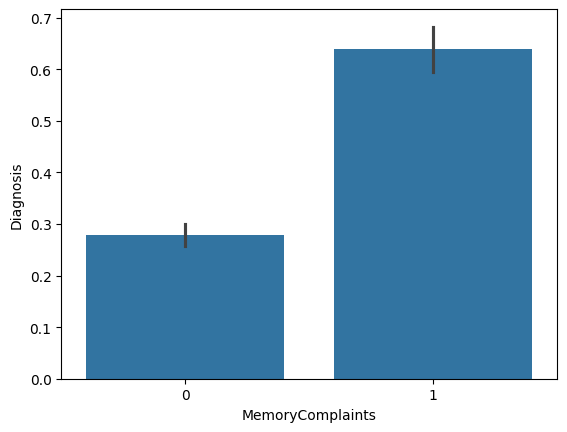

In [63]:
sns.barplot(x='MemoryComplaints',y='Diagnosis',data=df)

Patients who complained about memory have a higher diagnosis rate than the ones who did not.

<Axes: xlabel='Confusion', ylabel='Diagnosis'>

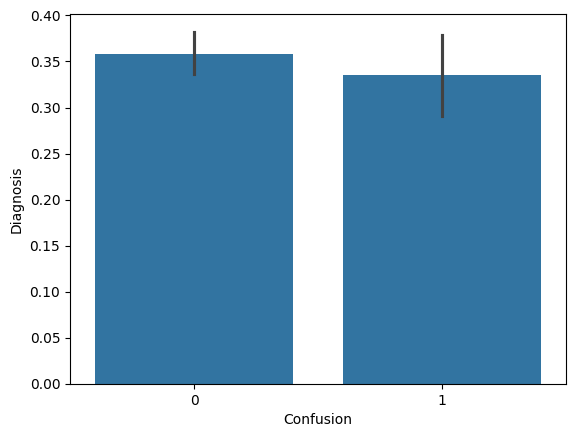

In [68]:
sns.barplot(x='Confusion',y='Diagnosis',data=df)

People with less confusion have higher chances of getting diagnosed.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

<Axes: xlabel='CholesterolTotal'>

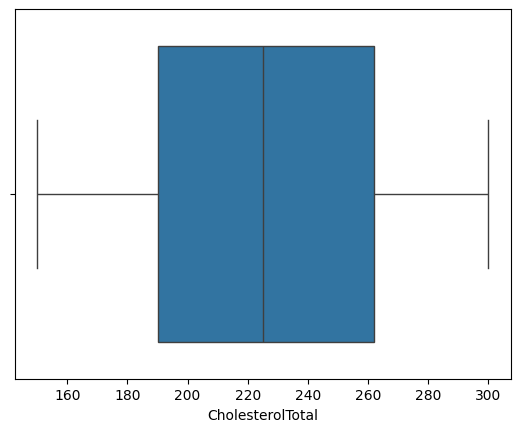

In [89]:
sns.boxplot(x='CholesterolTotal',data=df)

<Axes: xlabel='CholesterolLDL'>

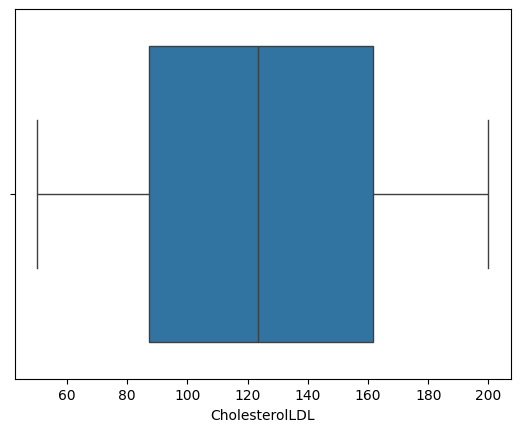

In [90]:
sns.boxplot(x='CholesterolLDL',data=df)

<Axes: xlabel='CholesterolHDL'>

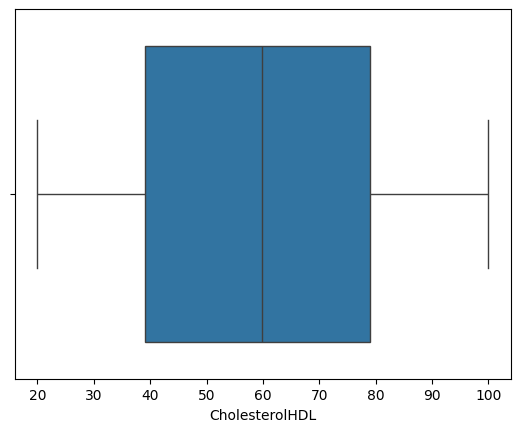

In [91]:
sns.boxplot(x='CholesterolHDL',data=df)

<Axes: xlabel='BMI'>

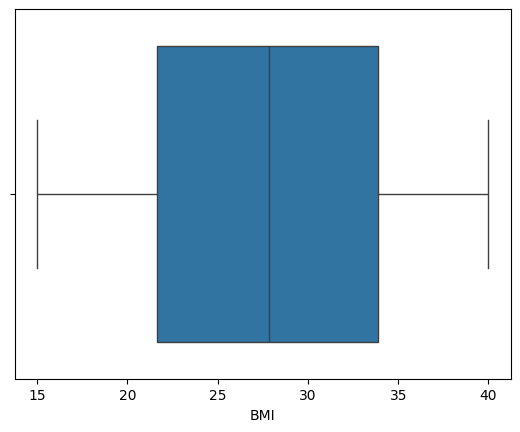

In [92]:
sns.boxplot(x='BMI',data=df)

Considering some of these values, none of them have outliers.

<Axes: xlabel='HeadInjury', ylabel='MemoryComplaints'>

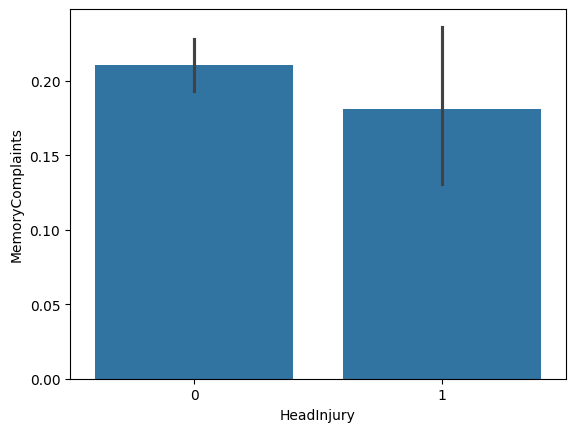

In [94]:
sns.barplot(x='HeadInjury',y='MemoryComplaints',data=df)

People with no head injury have a higher probability of having no memory complaints according to this dataset

<Axes: xlabel='HeadInjury', ylabel='Diagnosis'>

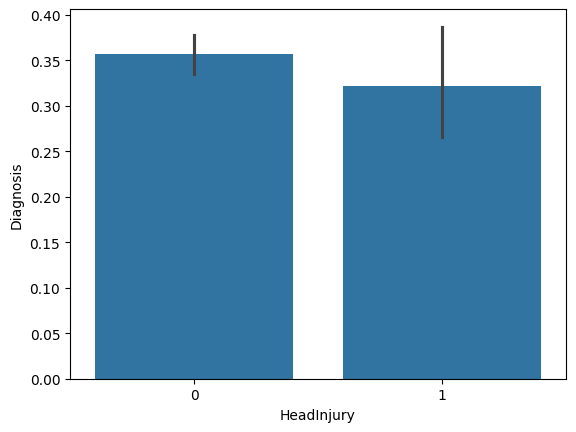

In [95]:
sns.barplot(x='HeadInjury',y='Diagnosis',data=df)

People with no Head injury are more likely to get diagnosed 

<Axes: xlabel='CardiovascularDisease', ylabel='Diagnosis'>

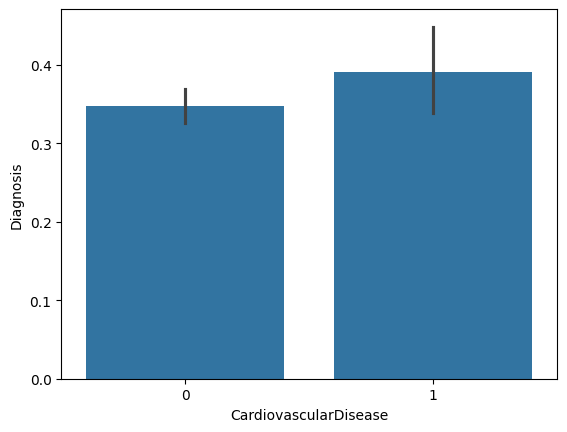

In [99]:
sns.barplot(x='CardiovascularDisease',y='Diagnosis',data=df)

Here, people with cardiovascular disease are more likely to get diagnosis 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

Considering some of these features, none of them have outliers, no null values, and also all are related to diagnosis


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

In [ ]:
['BMI','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','MMSE','FunctionalAssessment','FunctionalAssessment','ADL']

In [108]:
df['SystolicBP'].unique()

array([142, 115,  99, 118,  94, 168, 143, 117, 130, 131, 165, 145, 137,
       124, 148, 154, 132, 144, 120, 178, 106, 153, 177, 134, 107, 114,
        91,  90, 129,  97, 157, 164, 158,  98,  93, 147, 102, 127, 162,
       136, 105, 150, 100, 156, 121, 173, 161, 119, 163, 126, 169, 108,
        96,  92, 125, 149, 104, 122, 160, 133,  95, 139, 140, 112, 155,
       111, 172, 166, 141, 175, 176, 146, 135, 101, 116, 123, 152, 174,
       110, 167, 138, 170, 151, 128, 103, 159, 109, 179, 113, 171],
      dtype=int64)

In [110]:
df['Diagnosis'].unique()

array([0, 1], dtype=int64)

In [1]:
df['gender']

NameError: name 'df' is not defined